In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
%run Data_manipulation.ipynb

In [2]:
def detect_anomalies_pca(df, n_components=1, contamination=0.1):
    """
    Detect anomalies in a time series using Principal Component Analysis (PCA).

    Parameters:
    - df: DataFrame containing the time series data with a 'Close' column.
    - n_components: Number of principal components to use for PCA.
    - contamination: The proportion of anomalies in the data set.

    Returns:
    - anomalies: DataFrame containing the detected anomalies.
    """
    # Selecting the 'Close' column for anomaly detection
    data = df['Close'].values.reshape(-1, 1)

    # Initialize PCA
    pca = PCA(n_components=n_components)

    # Fit the PCA model
    pca.fit(data)

    # Project the data onto the principal components
    data_pca = pca.transform(data)

    # Reconstruct the data from the principal components
    data_reconstructed = pca.inverse_transform(data_pca)

    # Calculate the reconstruction error
    reconstruction_error = np.mean((data - data_reconstructed) ** 2, axis=1)

    # Determine the threshold for anomalies
    threshold = np.percentile(reconstruction_error, 100 * (1 - contamination))

    # Identify anomalies
    anomaly_labels = reconstruction_error > threshold

    # Anomalies are where reconstruction error is greater than the threshold
    anomalies = df[anomaly_labels]

    # Plot the time series data
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Close Price', color='blue')
    plt.scatter(anomalies.index, anomalies['Close'], color='red', label='Anomaly')
    plt.title('Time Series Data with Anomalies Detected using PCA')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    return anomalies

# NIFTY

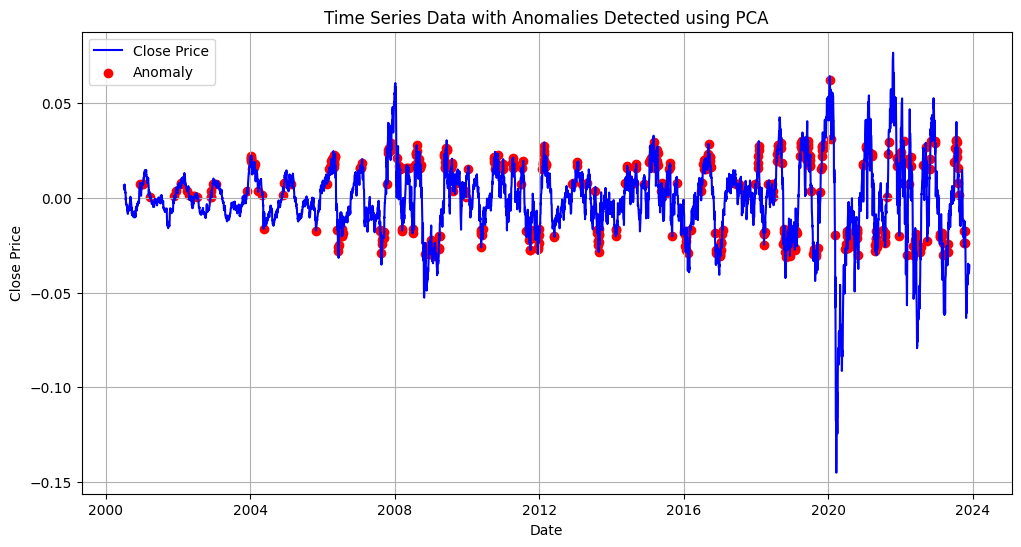

In [4]:
NIFTY = pd.read_csv('D:/UFG/Data collection/NIFTY.csv')
NIFTY['Date']= pd.to_datetime(NIFTY['Date'], format='%Y-%m-%d')
#NIFTY.set_index('Date', inplace=True)

scaled_data, scaler = scale_data(NIFTY)
df_residuals, df_trend, df_seasonal, decomposition_results = transform_to_stationary(scaled_data)

anomalies = detect_anomalies_pca(df_residuals)

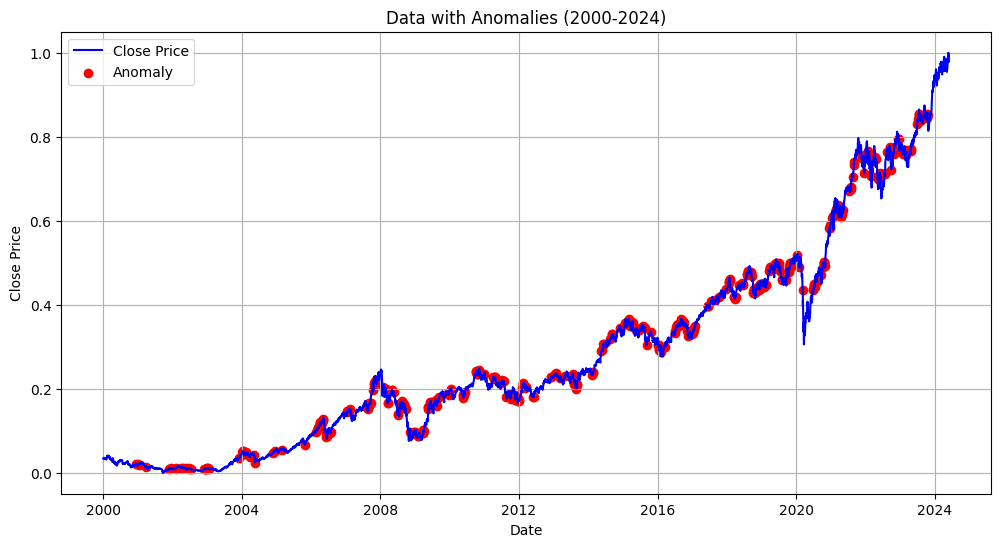

In [5]:
NIFTY_all = plot_with_anomalies(scaled_data, anomalies,25)

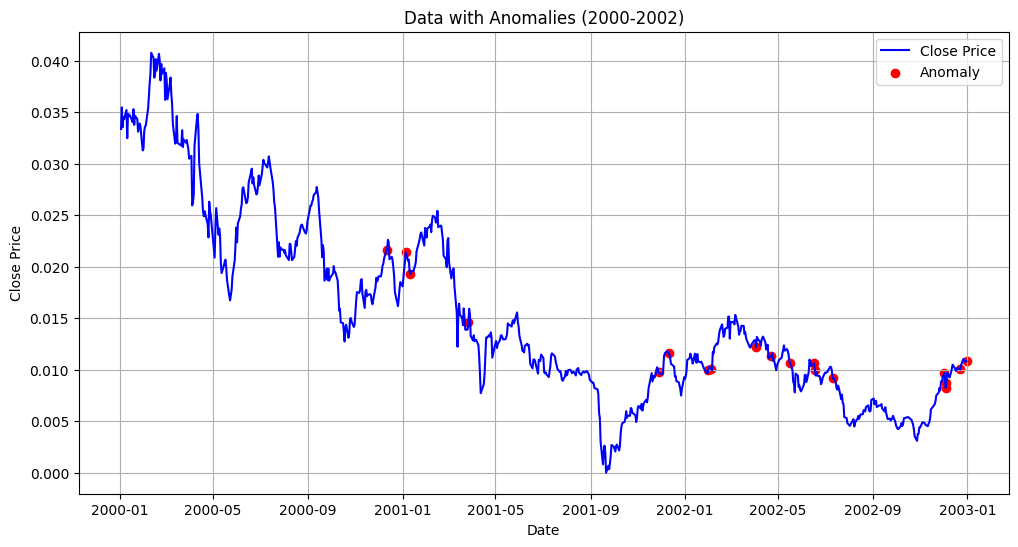

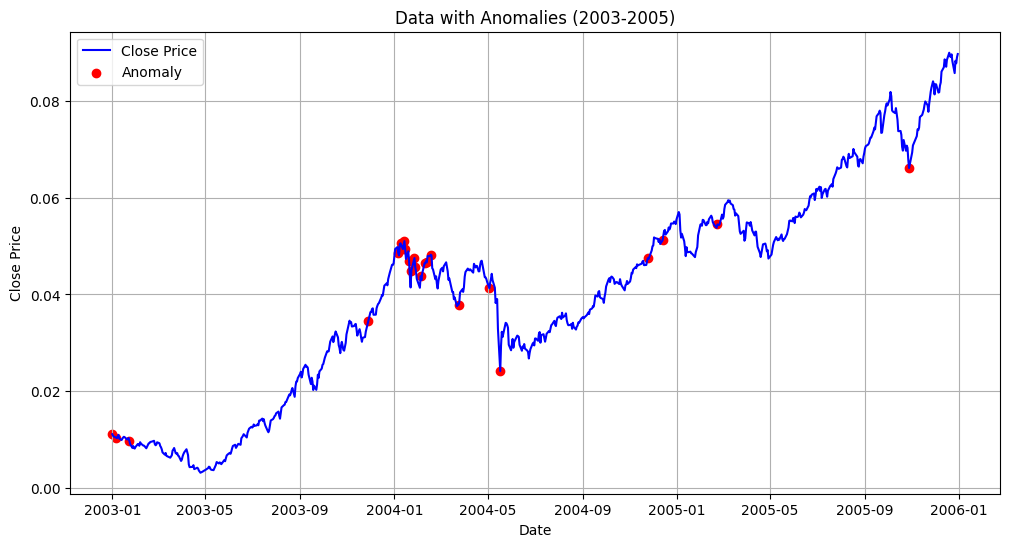

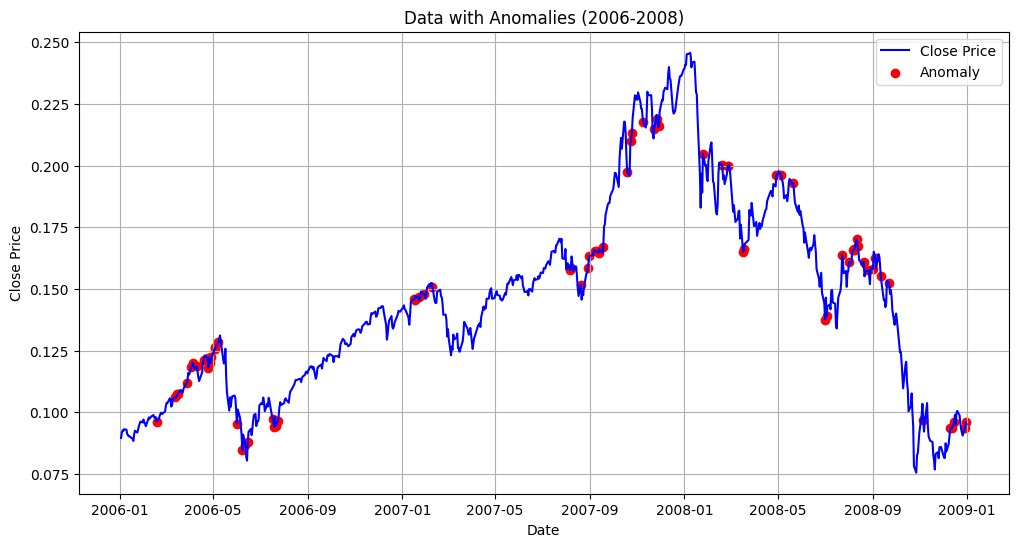

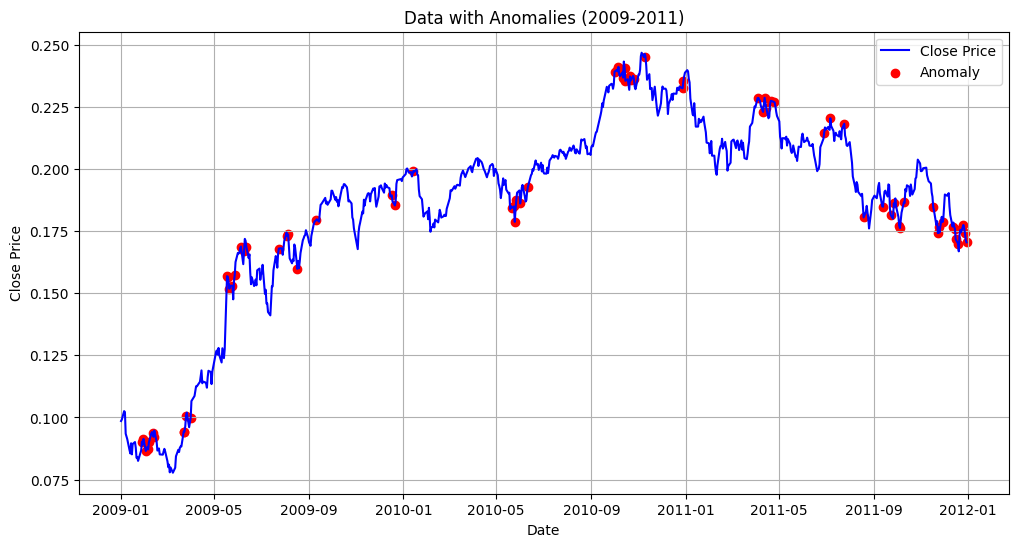

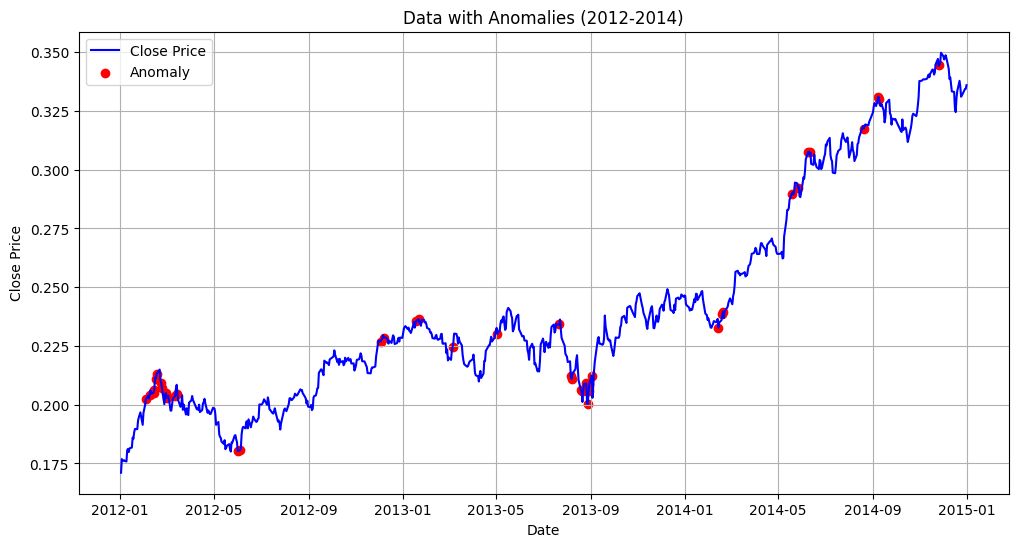

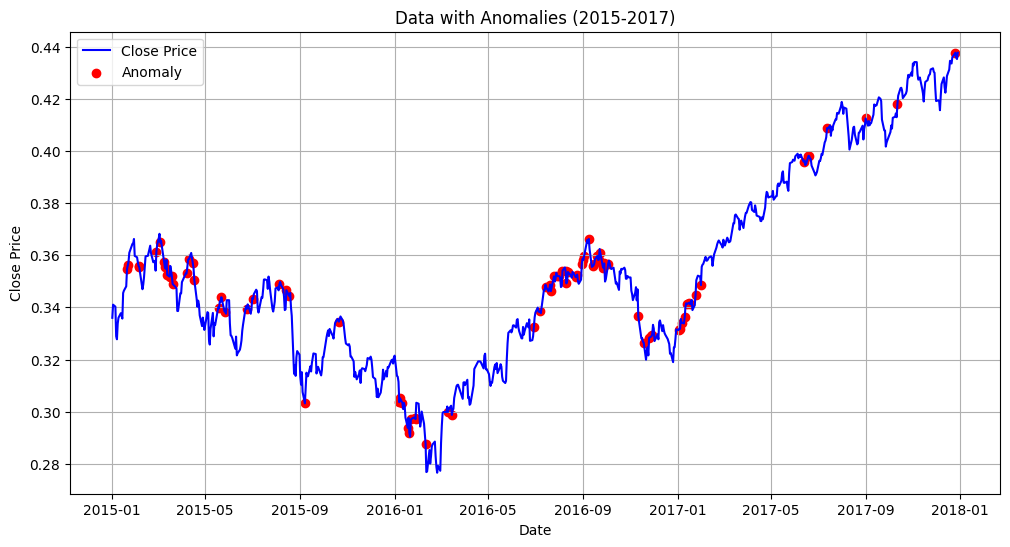

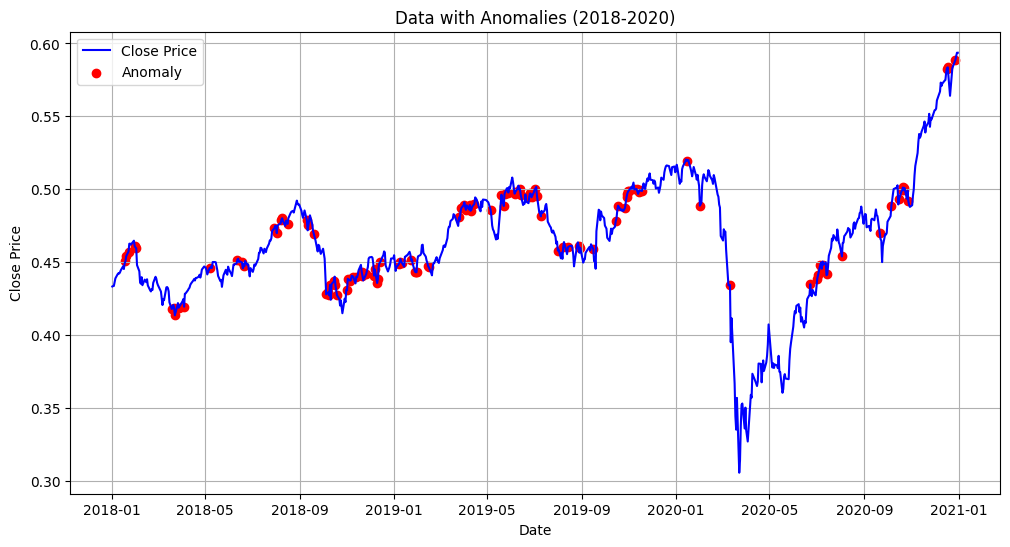

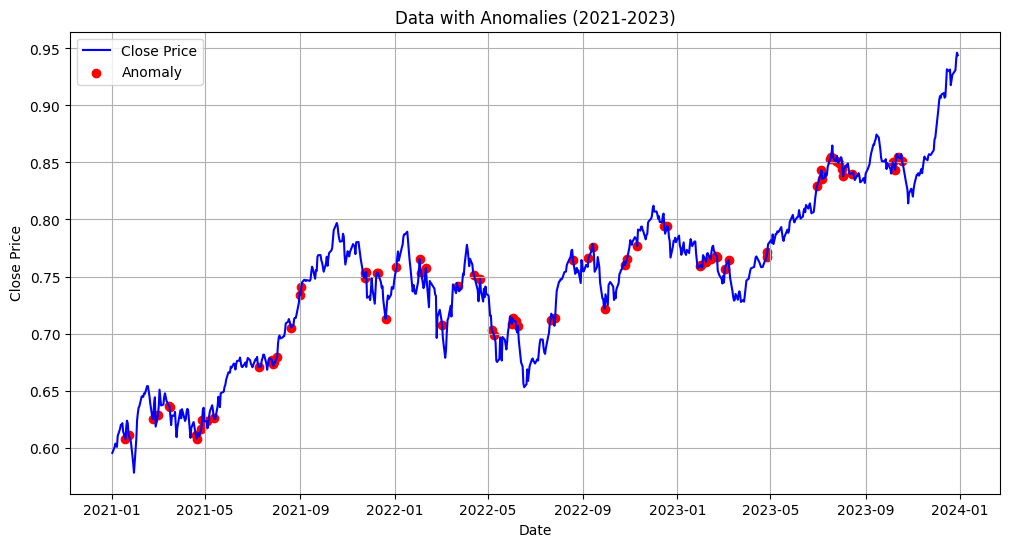

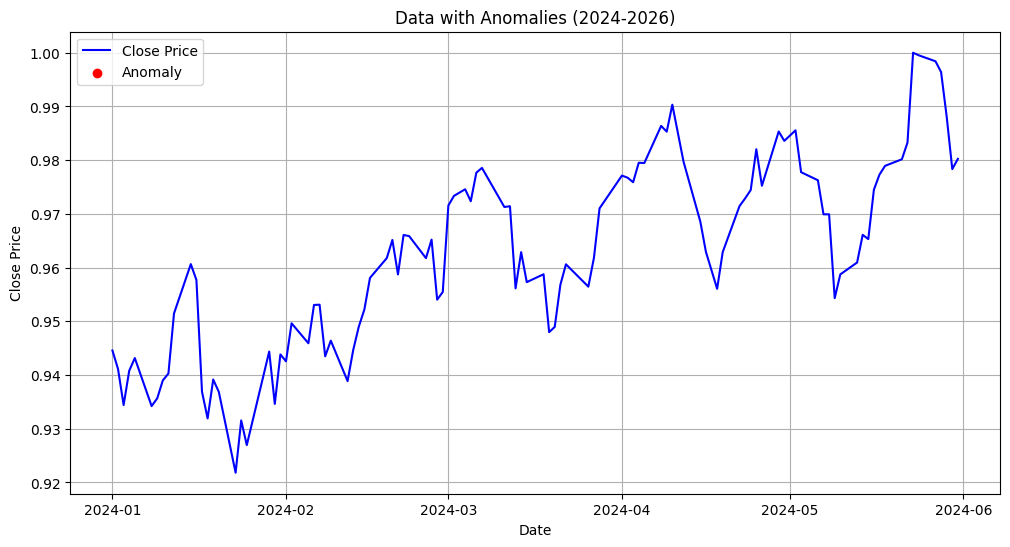

In [6]:
NIFTY_3 = plot_with_anomalies(scaled_data, anomalies, 3)

# IBOVESPA

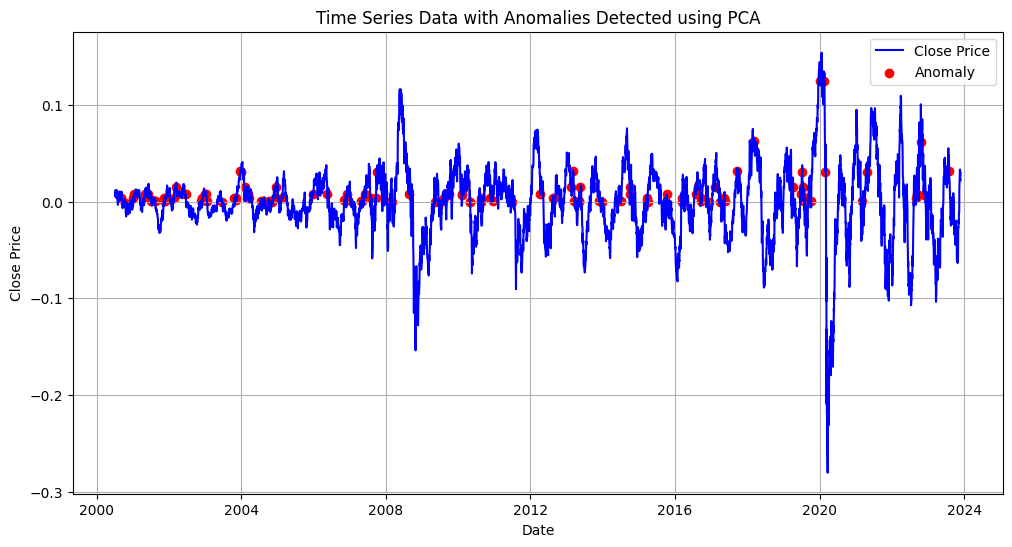

In [14]:
# Detecting anomaly
IBOV = pd.read_csv('D:/UFG/Data collection/IBOV.csv')
IBOV['Date']= pd.to_datetime(IBOV['Date'], format='%Y-%m-%d')

scaled_data, scaler = scale_data(IBOV)
df_residuals, df_trend, df_seasonal, decomposition_results = transform_to_stationary(scaled_data)

# Detect anomalies
anomalies = detect_anomalies_pca(df_residuals, n_components=1, contamination=0.4)


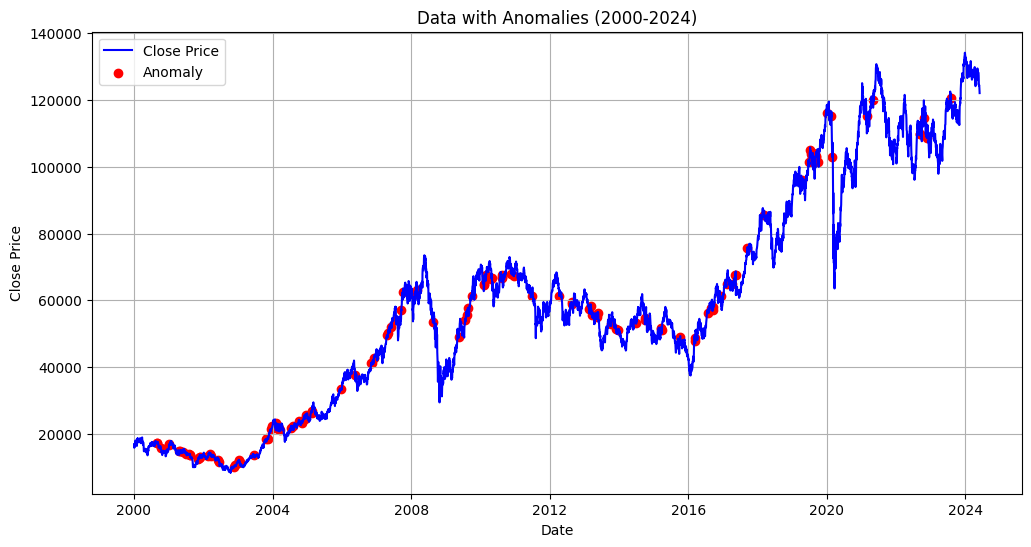

In [15]:
IBOV_all = plot_with_anomalies(IBOV, anomalies, 25)

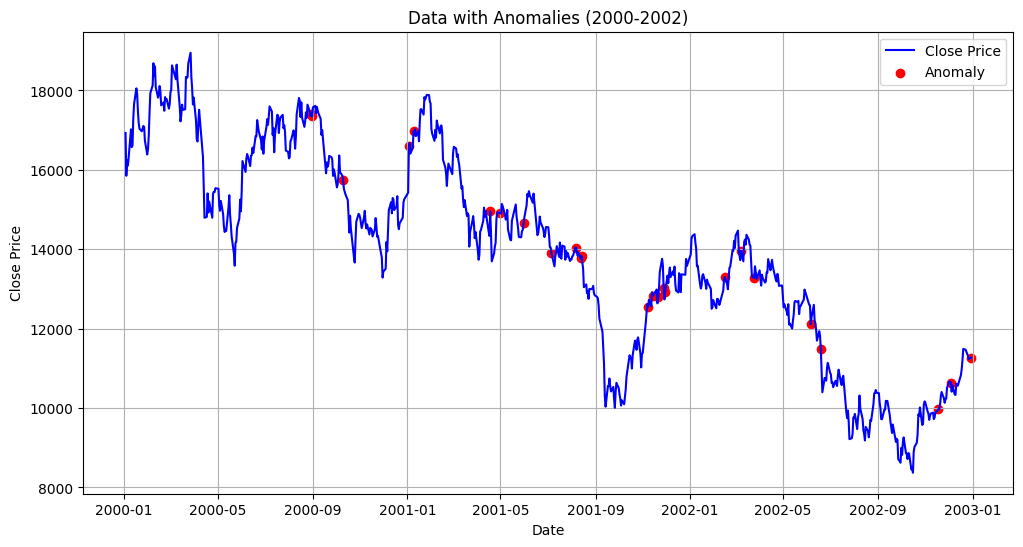

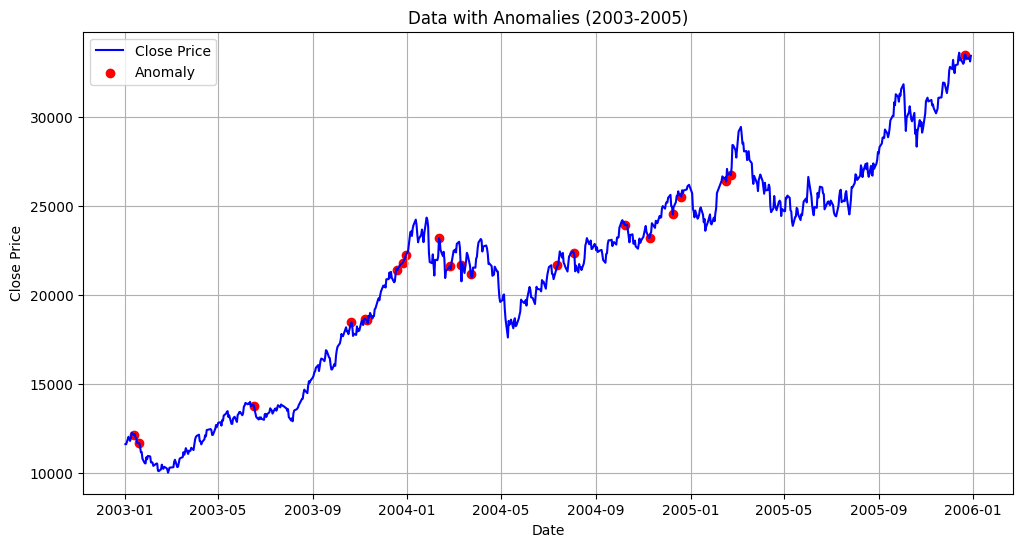

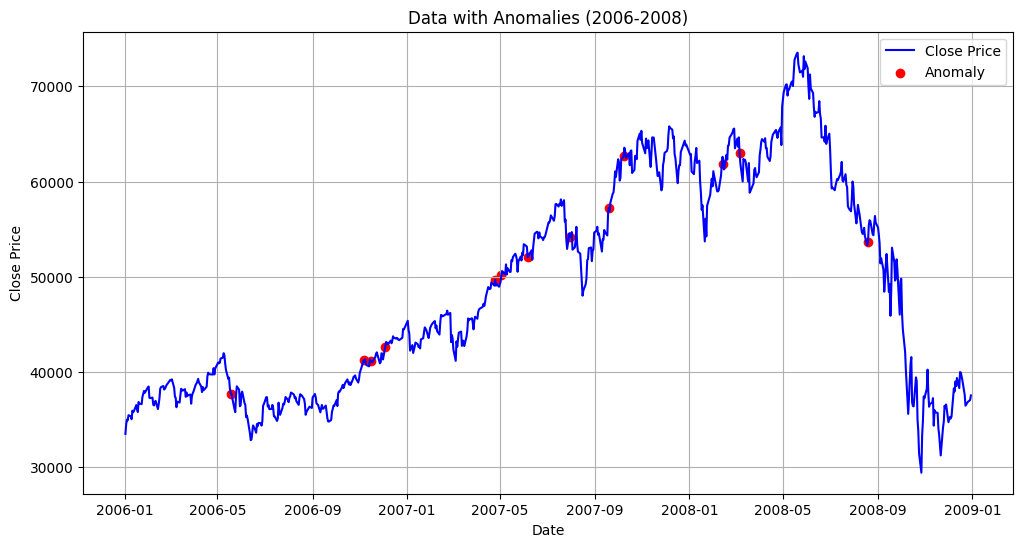

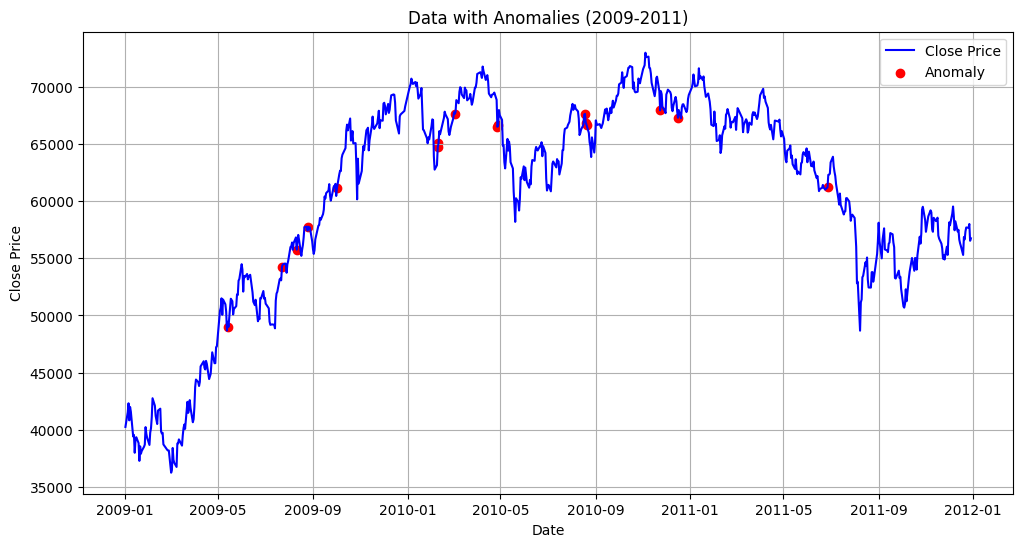

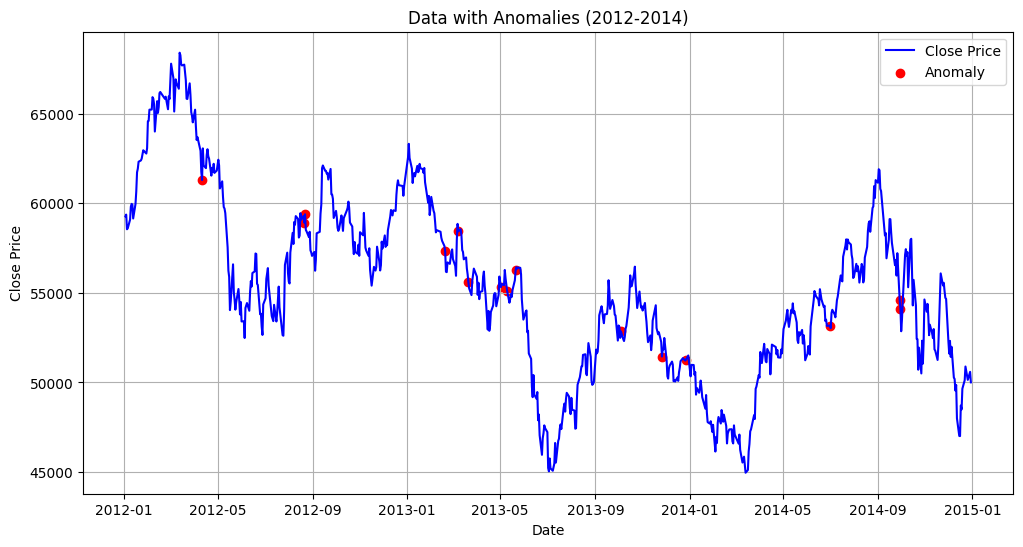

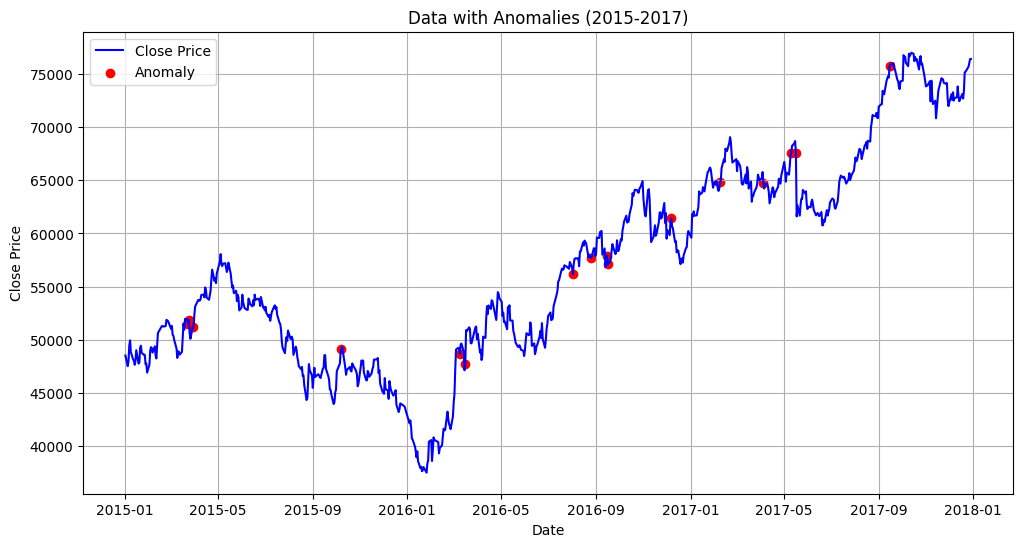

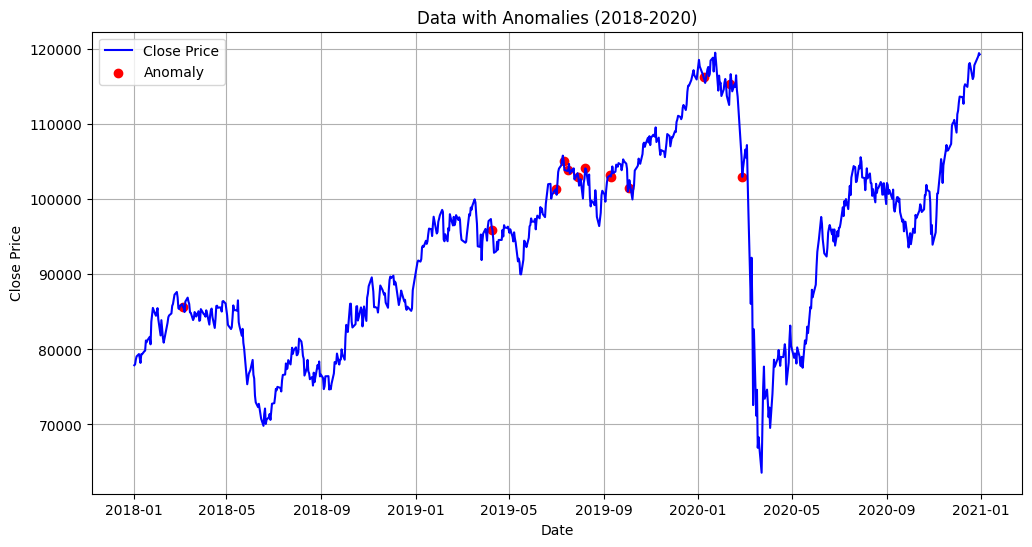

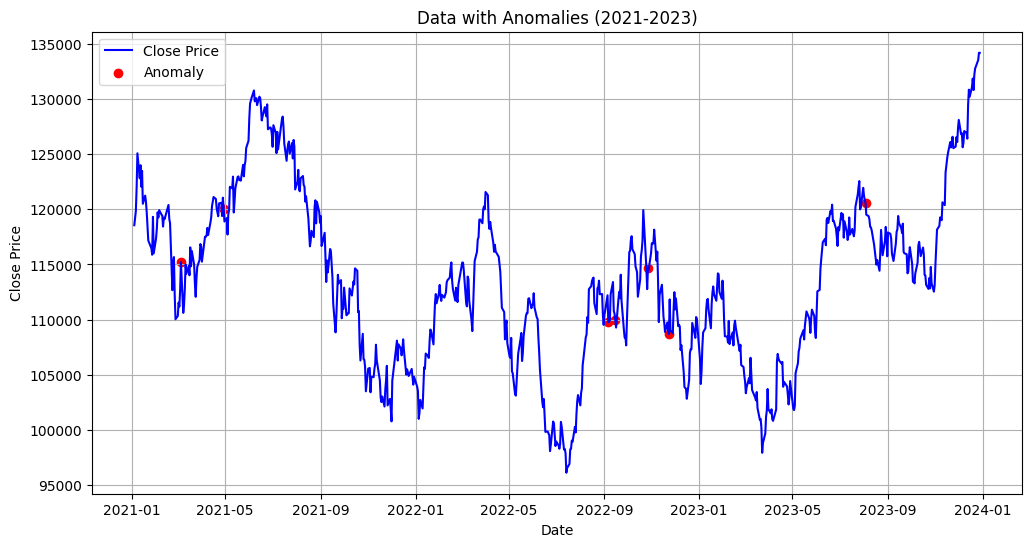

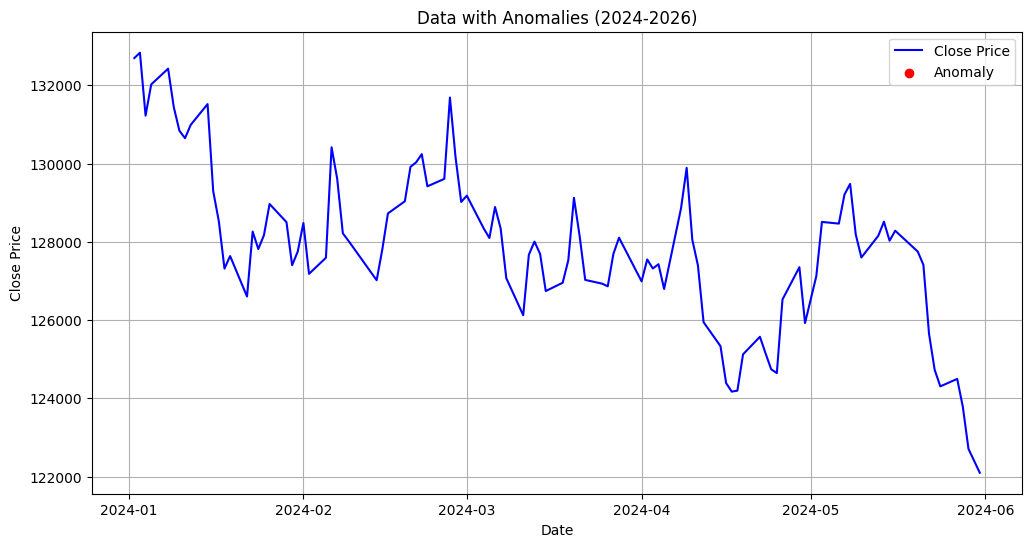

In [16]:
IBOV_3 = plot_with_anomalies(IBOV, anomalies, 3)